# Машинное обучение: начало

На предыдущих уроках мы изучили инструменты, которые позволяют работать с данными: загружать, просматривать, фильтровать, преобразовывать, визуализировать. Всё это делалось с помощью библиотек `numpy`, `pandas` и `matplotlib`. Такая работа позволяет получить представление об информации, содержащейся в данных, и сделать какие-то выводы.

Когда данных имеется достаточное количество, можно доверить получение выводов по этим данным в руки специальным алгоритмам, умеющим в зависимости от поставленной задачи прогнозировать интересующую нас величину, классифицировать объекты или разбивать их на группы.

Совокупность таких алгоритмов образует дисциплину под названием _Машинное обучение_. Эту дисциплину можно разделить на две основные части: обучение с учителем и обучение без учителя.

На этом уроке мы рассмотрим обучение с учителем. Основная особенность этого вида обучения состоит в том, что помимо набора данных, по которым мы хотим предсказать ту или иную величину, у нас имеется для этих данных набор правильных ответов. Наша задача в этом случае - построить модель, которая будет способна наиболее точно _обобщать_ эти данные, то есть предсказывать этот правильный ответ по данным, в которых этого правильного ответа у нас нет.

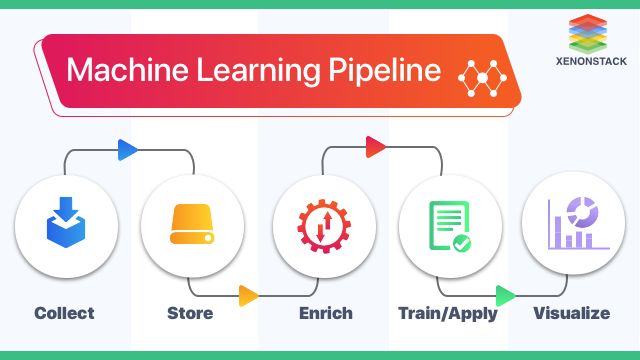

Мы снова будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

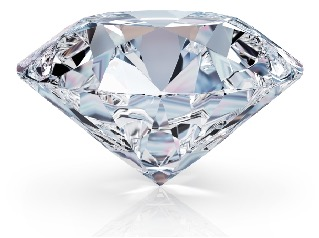

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIAMONDS_DATASET = "data/diamonds_clean.csv"

In [3]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

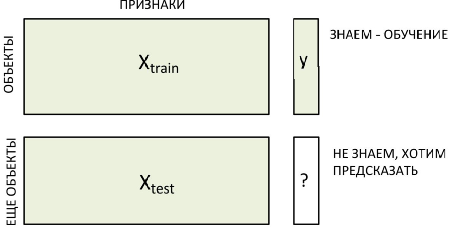

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

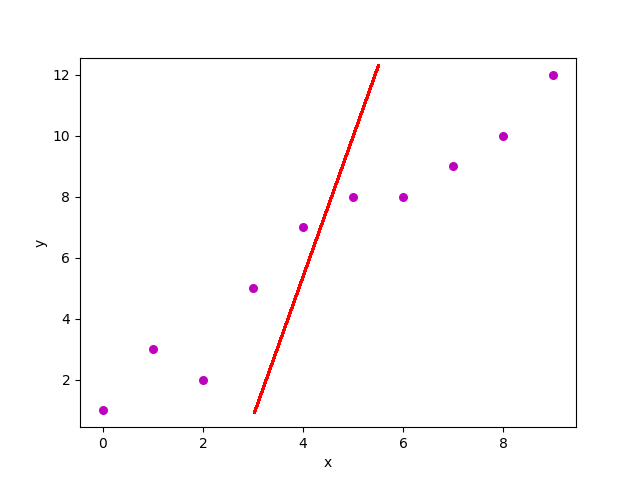

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

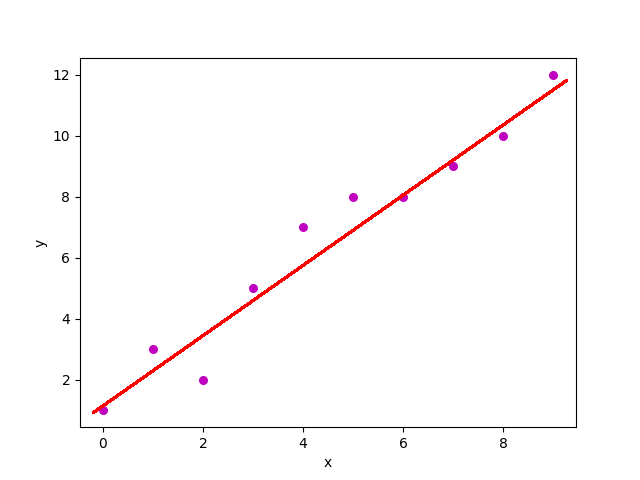

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [5]:
X = df[['carat','depth','table',"'x'","'y'","'z'"]]
y = df['price']

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [7]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred), np.mean(y)

(977.2282539113673, 3933.562828733389)

## Анализ распределения столбцов (целевой переменной)

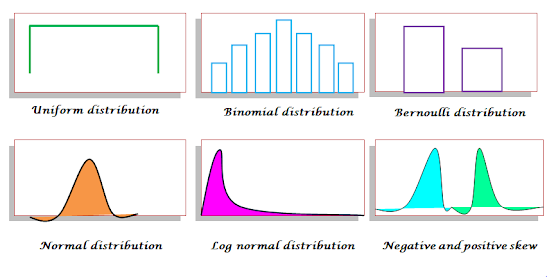

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

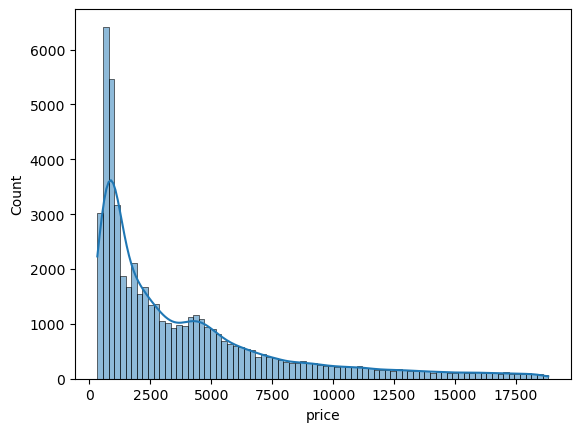

In [8]:
sns.histplot(data = df['price'], kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [9]:
mean_absolute_error(y[y < 10000], pred[y < 10000])

764.968822420708

In [10]:
mean_absolute_error(y[y >= 10000], pred[y >= 10000])

2957.8679605456946

Действительно, ошибка на дорогих алмазах больше.

# Простые нелинейные модели: классификация

## Наивный байесовский классификатор

In [11]:
X = df[['carat','depth','table',"'x'","'y'","'z'"]]
y_class = (y > 2500).astype(int)

In [12]:
y_class.value_counts()

price
0    27464
1    26341
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9397115670532263

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[6225,  632],
       [ 179, 6416]], dtype=int64)

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

In [18]:
accuracy_score(y_test, pred_knn)

0.9411983348201011

In [19]:
confusion_matrix(y_test, pred_knn)

array([[6415,  442],
       [ 349, 6246]], dtype=int64)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train_scaled, y_train)

pred_knn = knn_cl.predict(X_test_scaled)

In [21]:
accuracy_score(y_test, pred_knn)

0.9423877490336009

In [22]:
confusion_matrix(y_test, pred_knn)

array([[6433,  424],
       [ 351, 6244]], dtype=int64)

## Кросс-валидация

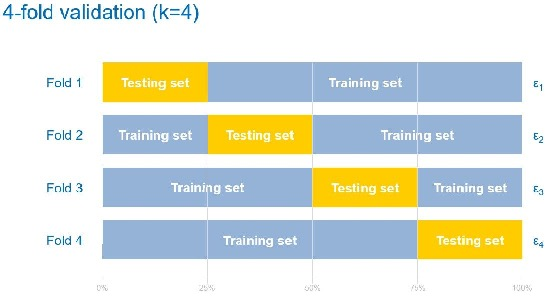

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_cl, X, y_class, scoring='accuracy', cv=3, n_jobs=-1).mean()

0.8938016912926307

In [24]:
from sklearn.model_selection import cross_validate

cross_validate(knn_cl, X, y_class, scoring=['accuracy', 'f1'], cv=3, n_jobs=-1)

{'fit_time': array([0.07674575, 0.0552156 , 0.07132912]),
 'score_time': array([0.91451192, 0.91445851, 0.95776105]),
 'test_accuracy': array([0.86936158, 0.99632004, 0.81572345]),
 'test_f1': array([0.84602747, 0.99624744, 0.83911795])}

## Подбор гиперпараметров моделей

При подборе гиперпараметров мы разбиваем выборку на три части:
* train - обучение модели
* validation - применение модели для разных наборов гиперпараметров
* test - проверка качества модели с лучшими найденными гиперпараметрами

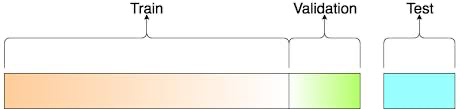

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [26]:
best_k = -1
best_acc = -1

for k in np.arange(2, 30, 1):
    knn_cl = KNeighborsClassifier(n_neighbors=k) # по умолчанию n_neighbors=5

    knn_cl.fit(X_train, y_train)
    pred_knn = knn_cl.predict(X_val)
    acc = accuracy_score(y_val, pred_knn)

    if acc > best_acc:
        best_k = k
        best_acc = acc

    print('n_neighbors:', k, 'accuracy:', acc)

print(best_k, best_acc)

n_neighbors: 2 accuracy: 0.9295272078501338
n_neighbors: 3 accuracy: 0.936465457428883
n_neighbors: 4 accuracy: 0.9355733967687581
n_neighbors: 5 accuracy: 0.9396372286648825
n_neighbors: 6 accuracy: 0.9396372286648825
n_neighbors: 7 accuracy: 0.9416195856873822
n_neighbors: 8 accuracy: 0.9404301714738824
n_neighbors: 9 accuracy: 0.9418178213896323
n_neighbors: 10 accuracy: 0.9413222321340073
n_neighbors: 11 accuracy: 0.9413222321340073
n_neighbors: 12 accuracy: 0.9420160570918823
n_neighbors: 13 accuracy: 0.9428089999008822
n_neighbors: 14 accuracy: 0.9428089999008822
n_neighbors: 15 accuracy: 0.9421151749430072
n_neighbors: 16 accuracy: 0.9417187035385073
n_neighbors: 17 accuracy: 0.9421151749430072
n_neighbors: 18 accuracy: 0.9425116463475072
n_neighbors: 19 accuracy: 0.9432054713053821
n_neighbors: 20 accuracy: 0.943899296263257
n_neighbors: 21 accuracy: 0.9436019427098821
n_neighbors: 22 accuracy: 0.9431063534542571
n_neighbors: 23 accuracy: 0.9436019427098821
n_neighbors: 24 accu

In [27]:
knn_cl = KNeighborsClassifier(n_neighbors=20) # по умолчанию n_neighbors=5

knn_cl.fit(X_train, y_train)
pred_knn = knn_cl.predict(X_test)

acc = accuracy_score(y_test, pred_knn)
print(acc)

0.9448409158489444


In [28]:
confusion_matrix(y_test, pred_knn)

array([[6444,  413],
       [ 329, 6266]], dtype=int64)

## Подбор гиперпараметров по сетке

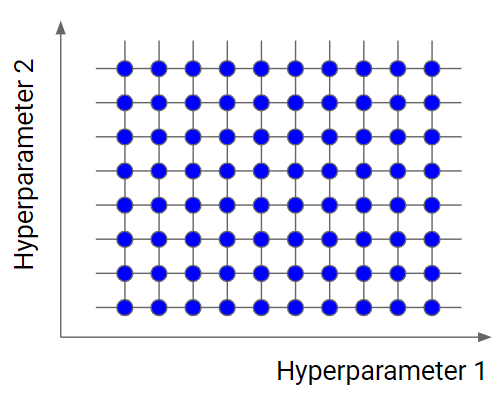

In [29]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [30]:
gs.best_score_, gs.best_params_

(0.9466458503704805, {'n_neighbors': 16, 'p': 1, 'weights': 'uniform'})

In [31]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.9463276836158192

In [32]:
confusion_matrix(y_test, pred)

array([[6467,  390],
       [ 332, 6263]], dtype=int64)

# Explainer Dashboard

[tutorial](https://github.com/oegedijk/explainerdashboard/blob/c7c515c05c5a161226193e40a8258c310fc7901d/notebooks/dashboard_examples.ipynb)

In [33]:
# !pip install explainerdashboard -q

In [34]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer, ExplainerDashboard

In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:
explainer = ClassifierExplainer(gs.best_estimator_, X_test.iloc[:1000], y_test.iloc[:1000])

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [37]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/1000 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [38]:
db.run()

Starting ExplainerDashboard on http://192.168.1.44:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_10d09575-bbb8-4e07-bbe8-27ff812687d3 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001F9624A6E70>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

# Домашнее задание

## KNN для задачи регрессии

In [45]:
X = df[['carat','depth','table',"'x'","'y'","'z'"]]
y_reg = df['price']

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

### Задание 1

Чему равна ошибка MAE на кросс-валидации с тремя фолдами? Ответ округлите до целого числа.

In [ ]:
# scoring = 'neg_mean_absolute_error'

# your code here

MAE = cross_val_score(knn_reg, X, y_reg, scoring='neg_mean_absolute_error', cv=3).mean()
round(MAE)

-1959

Разобъем данные на трейн и тест

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.25, random_state=42)

### Задание 2

Обучите KNN с гиперпараметрами по умолчанию на тренировочных данных и вычислите MAE на тесте. Ответ округлите до целого числа.

In [54]:
from sklearn.metrics import mean_absolute_error

# your code here

knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
round(MAE)

KNeighborsRegressor()

826

### Задание 3

Подберите по сетке на тренировочных данных гиперпараметры метода:

* `n_neighbors` в диапазоне от 2 до 30 не включительно с шагом 2
* `weights` - `uniform` или `distance`
* `p` - 1 или 2

Метрика - `neg_mean_squared_error`, `cv=3`

Чему равно число соседей у наилучшей модели?

In [57]:
# your code here

params = {
    'n_neighbors': range(2, 30, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

gs = GridSearchCV(knn_reg, params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 3 folds for each of 56 candidates, totalling 168 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

{'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}

### Задание 4

Вычислите качество наилучшей найденной модели на тестовых данных (MAE), ответ округлите до целого числа.

In [58]:
# your code here
y_pred = gs.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)

round(MAE)

785

### Задание 5

Постройте explainer dashboard для наилучшей модели (на первых 1000 объектах тестовой выборки).

Какой признак по методу SHAP самый важный для модели?

In [ ]:
# your code here

explainer = RegressionExplainer(gs.best_estimator_, X_test.iloc[:1000], y_test.iloc[:1000], n_jobs=-1)
db = ExplainerDashboard(explainer)
db.run()

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/1000 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.44:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_10d09575-bbb8-4e07-bbe8-27ff812687d3 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001F969D4F380>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []Empty DataFrame
Columns: [col, contribution, value]
Index: []



y

### Задание 6

По explainer dashboard ответьте, чему равен прогноз модели для объекта с индексом 32390?

Ответ округлите до целого числа.

794

### Задание 7

По explainer dashboard ответьте, какой признак с точки зрения подхода SHAP дает наибольший вклад в прогноз на объекте с индексом 6234?

depth

In [ ]:
# При медицинском обследовании вероятность обнаружить редкое заболевание у больного равна 0.9, 
# вероятность принять здорового человека за больного равна 0.01. 
# Доля больных редким заболеванием по отношению ко всему населению равна 0.001.

# Найти вероятность того, что человек здоров, если он был признан больным при обследовании.
# Ответ округлите до тысячных.

# A - признан больным
# B - болен, Z - здоров
P_B_A = 0.9 # обнаружено, болен
P_A = 0.001 # болен
P_B_Z = 0.01
P_Z = 1 - P_A

P_B = P_Z * P_B_Z + P_A * P_B_A

P_Z_B = P_B_Z * P_Z / P_B  
round(P_Z_B, 3)

0.917

Пусть А - пациент здоров, x - результат исследования положительный (тест показал, что пациент болен). <br><br>
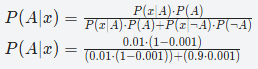 <br><br>
Чтобы получить вероятность события, нужно вероятность ложноположительного исхода поделить на вероятность всех положительных исходов.